In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/scratch/mlsample/research/project_files/alphafold2/distributed_alphafold2/fatcat_tm_align_search_results.csv')

In [5]:
df[df['TM2'] > 0.5]

,query,prot_pdb,p_val,rmsd,identity,similarity,score,afp,proteome,TM1,TM2,RMSD,ID1,ID2,IDali,L1,L2,Lali
57,1oe6B.pdb,6xawA.pdb,0.3160,2.35,0.0240,0.1200,83.83,6687.0,test_proteome_1,0.1973,0.5099,3.88,0.012,0.043,0.048,245.0,69.0,63.0
205,5gwyB.pdb,3fawA1.pdb,0.1080,3.26,0.0800,0.2100,85.61,7098.0,test_proteome_1,0.1788,0.5271,3.23,0.033,0.125,0.154,305.0,80.0,65.0
348,m142.pdb,6xawA.pdb,0.2300,2.76,0.0833,0.1250,97.43,7222.0,test_proteome_1,0.1585,0.5199,3.21,0.023,0.101,0.121,306.0,69.0,58.0
399,1igtB3.pdb,3fawA1.pdb,0.0132,3.37,0.0388,0.1553,73.69,2724.0,test_proteome_1,0.4529,0.5622,3.32,0.037,0.050,0.056,108.0,80.0,71.0
479,1igtB3.pdb,3aawA3.pdb,0.0509,3.10,0.0505,0.1717,57.23,2107.0,test_proteome_1,0.4431,0.5261,3.10,0.028,0.035,0.044,108.0,85.0,68.0


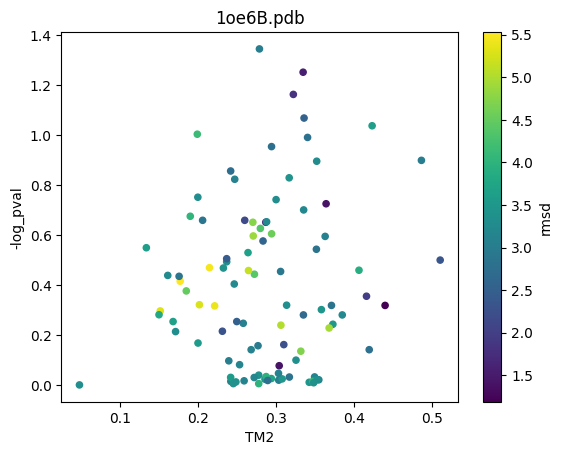

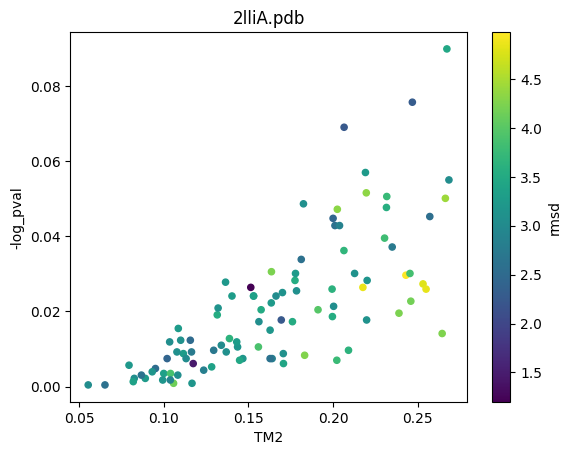

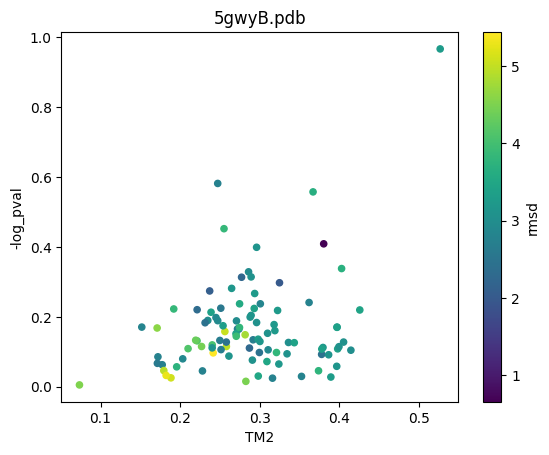

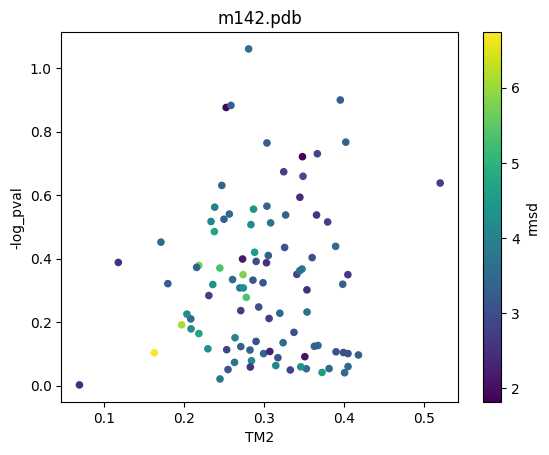

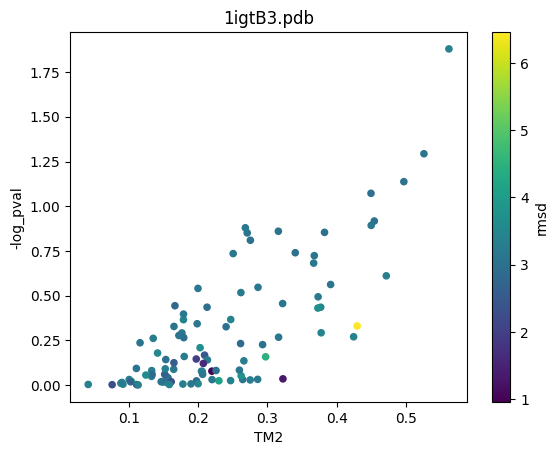

In [25]:
query_names = df['query'].unique()
query_dfs = {elem : pd.DataFrame() for elem in query_names}
for key in query_dfs.keys():
    query_dfs[key] = df[:][df['query'] == key]
    
for key, sub_df in query_dfs.items():
    sub_df['-log_pval'] = -np.log10(sub_df['p_val'])
    sub_df.plot.scatter(y='-log_pval', x='TM2', c='rmsd')
    plt.title(key)